# Task
The final task is tocalculate the `Expected Loss` &  summarize the findings from the logistic regression model for predicting loan defaults, including the interpretation of its coefficients, the AUC-ROC score, and the confusion matrix, and to assess if the model meets desired performance criteria and business objectives based on the provided data "Task 3 and 4_Loan_Data.csv".

## Load and Initial Data Exploration

Load the dataset and perform initial exploratory data analysis to understand the distributions, identify potential outliers, and check for missing values. This step is crucial for getting a feel for your data.


In [1]:
# Required Libraries


import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [2]:
# Loading data

df = pd.read_csv("E:\\J P Morgan Quantitative Research\\Task 3 and 4_Loan_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [3]:
# Checking Null

print("Missing values per column:\n", df.isnull().sum())
print("\nDistribution of 'default' target variable:\n", df['default'].value_counts())

Missing values per column:
 customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

Distribution of 'default' target variable:
 default
0    8149
1    1851
Name: count, dtype: int64


## Exploratory Data Analysis

In [4]:
# Define the variable features
features = ['credit_lines_outstanding', 'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

In [11]:
# Calculate the payment_to_income ratio
df['payment_to_income'] = df['loan_amt_outstanding'] / df['income']
    
# Calculate the debt_to_income ratio
df['debt_to_income'] = df['total_debt_outstanding'] / df['income']


In [13]:
# Summary Statistics

print(df.describe())

        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.000000e+04              10000.000000          10000.000000   
mean   4.974577e+06                  1.461200           4159.677034   
std    2.293890e+06                  1.743846           1421.399078   
min    1.000324e+06                  0.000000             46.783973   
25%    2.977661e+06                  0.000000           3154.235371   
50%    4.989502e+06                  1.000000           4052.377228   
75%    6.967210e+06                  2.000000           5052.898103   
max    8.999789e+06                  5.000000          10750.677810   

       total_debt_outstanding         income  years_employed    fico_score  \
count            10000.000000   10000.000000    10000.000000  10000.000000   
mean              8718.916797   70039.901401        4.552800    637.557700   
std               6627.164762   20072.214143        1.566862     60.657906   
min                 31.652732    1000.000000    

**Reasoning**:
To further understand the distributions and identify potential outliers as part of the exploratory data analysis, I will visualize the distributions of the numerical features using histograms. Histograms are effective for showing the shape of the data distribution and identifying skewness or multiple modes.



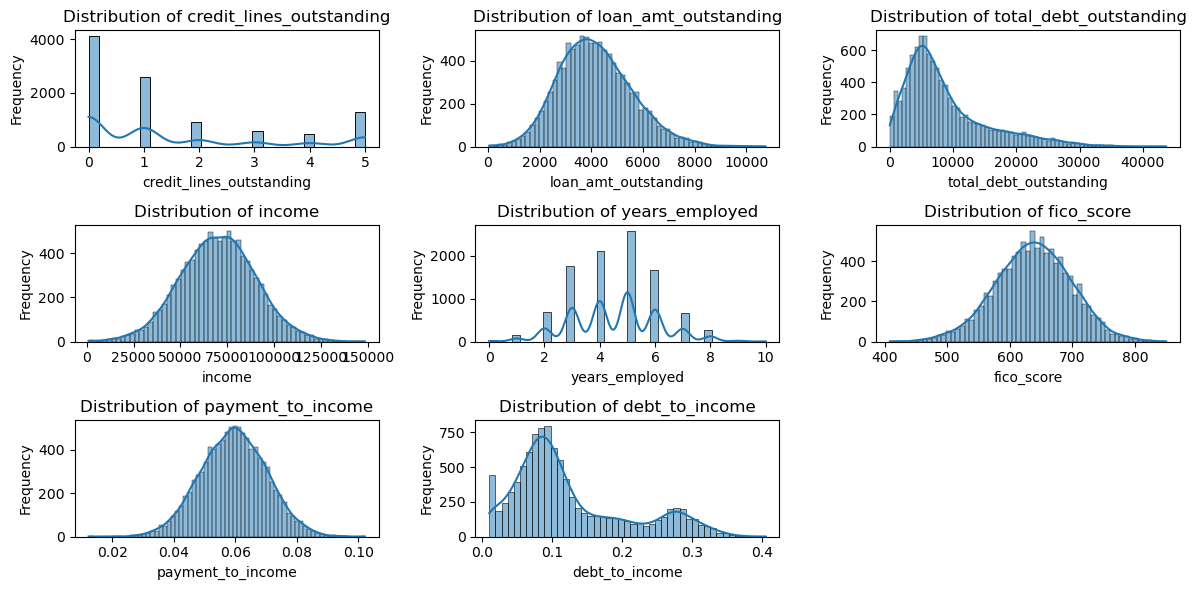

Histogram for numerical features have been plotted.


In [15]:
# identify numerical columns for plotting distributions 
numerical_cols = ['credit_lines_outstanding', 'loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score', 'payment_to_income', 'debt_to_income']

plt.figure(figsize=(12,6))

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()
print("Histogram for numerical features have been plotted.")

C:\Users\Ahmad Reza\AppData\Local\Temp\ipykernel_32476\2322447394.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=default_rate_by_years, x='years_employed', y='default', palette='viridis')
C:\Users\Ahmad Reza\AppData\Local\Temp\ipykernel_32476\2322447394.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='default', y='debt_to_income', palette='Set2')


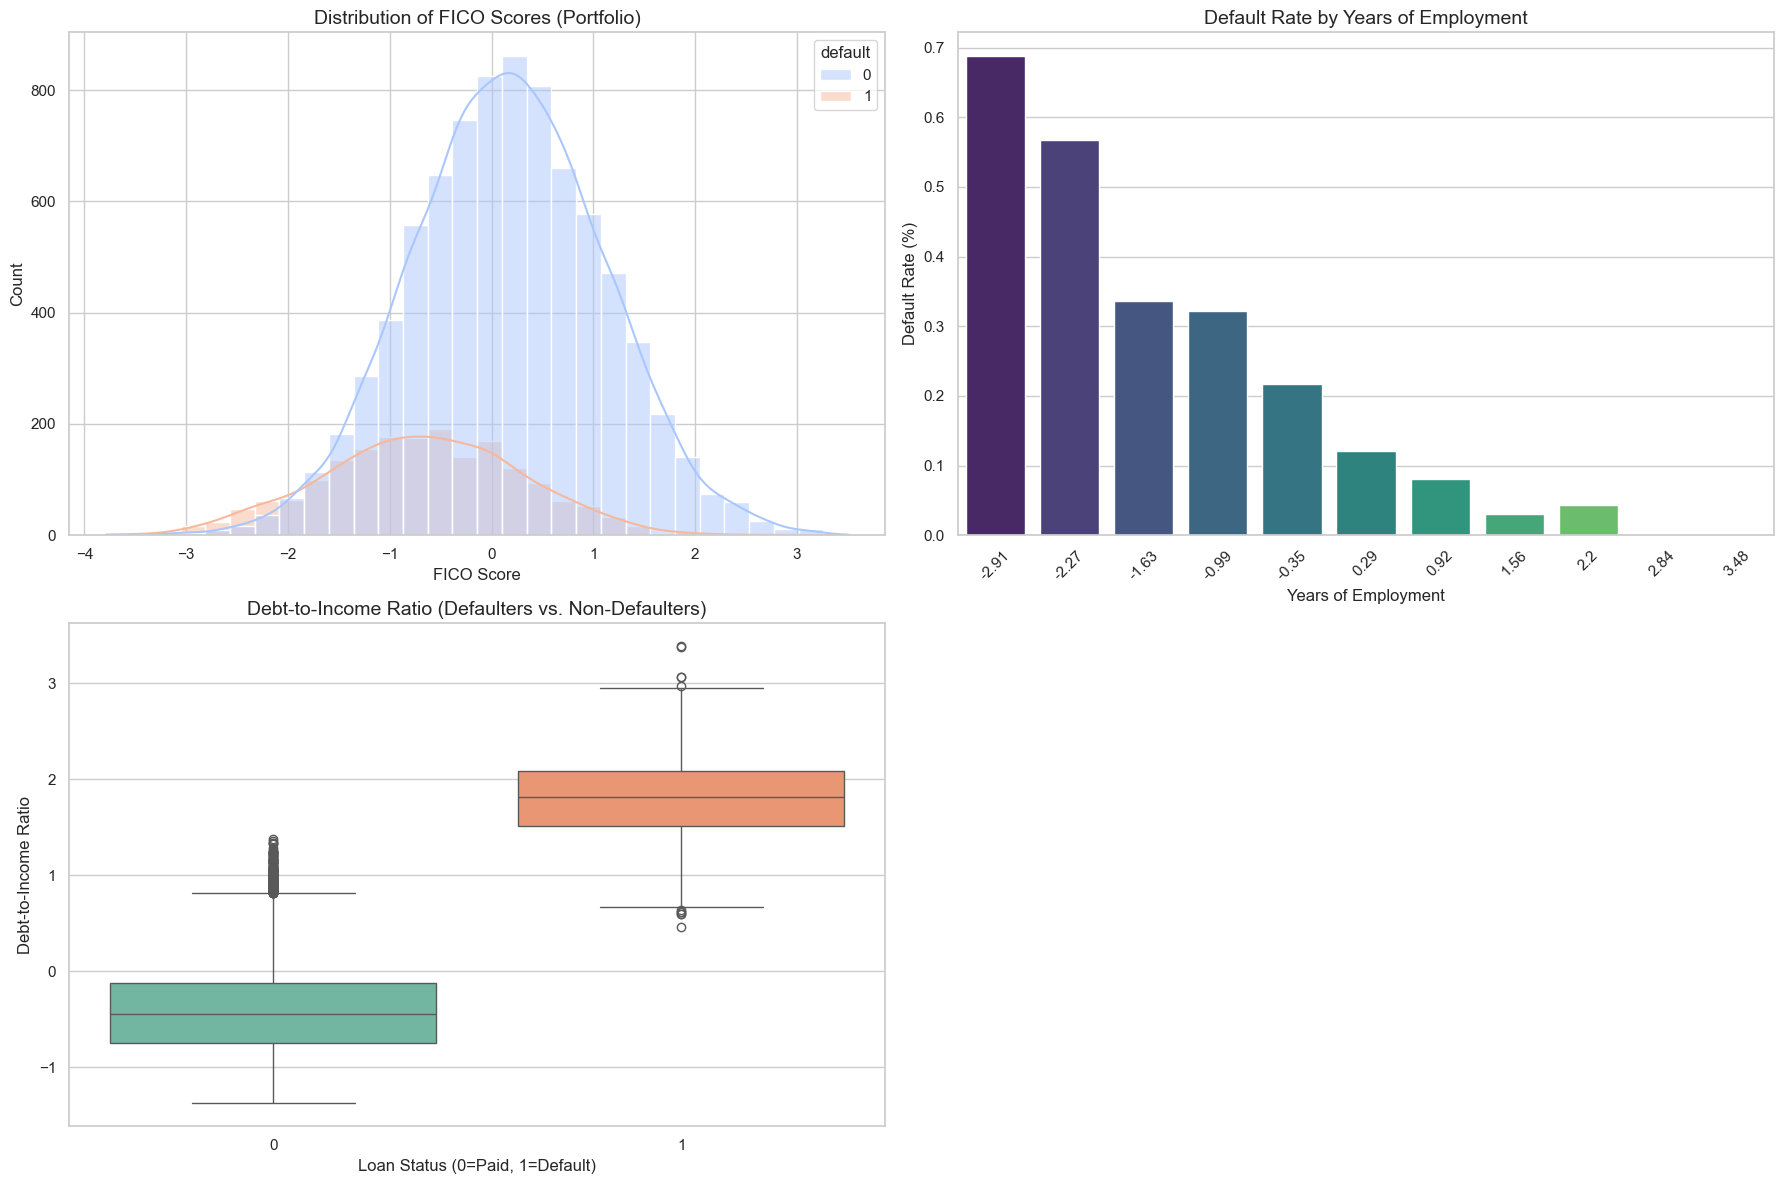

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a professional style
sns.set(style="whitegrid")

# Create a figure with 3 subplots (organized for readability)
plt.figure(figsize=(18, 12))

# --- FIGURE 1: Distribution of FICO Scores ---
plt.subplot(2, 2, 1) # Top-Left
sns.histplot(data=df, x='fico_score', hue='default', bins=30, kde=True, palette='coolwarm')
plt.title('Distribution of FICO Scores (Portfolio)', fontsize=14)
plt.xlabel('FICO Score')
plt.ylabel('Count')

# --- FIGURE 3: Default Rate by Years of Employment ---
plt.subplot(2, 2, 2) # Top-Right
# Calculate default rate per year category
default_rate_by_years = df.groupby(df['years_employed'].round(2))['default'].mean().reset_index()
sns.barplot(data=default_rate_by_years, x='years_employed', y='default', palette='viridis')
plt.title('Default Rate by Years of Employment', fontsize=14)
plt.xlabel('Years of Employment')
plt.ylabel('Default Rate (%)')
# Optional: Rotate x-labels if they overlap
plt.xticks(rotation=45) 

# --- FIGURE 4: Boxplot of Debt-to-Income Ratio ---
plt.subplot(2, 2, 3) # Bottom-Left
sns.boxplot(data=df, x='default', y='debt_to_income', palette='Set2')
plt.title('Debt-to-Income Ratio (Defaulters vs. Non-Defaulters)', fontsize=14)
plt.xlabel('Loan Status (0=Paid, 1=Default)')
plt.ylabel('Debt-to-Income Ratio')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

C:\Users\Ahmad Reza\AppData\Local\Temp\ipykernel_32476\3766627218.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='default', y='debt_to_income', palette='Set2')


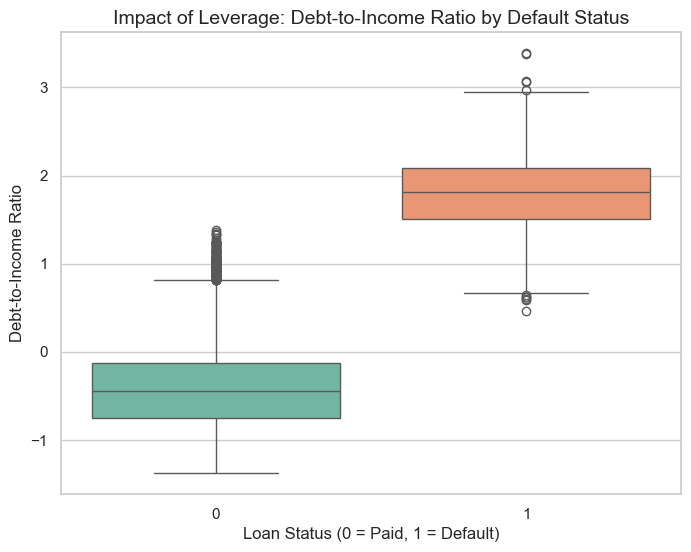

In [154]:
# debt to income ration by default

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='default', y='debt_to_income', palette='Set2')
plt.title('Impact of Leverage: Debt-to-Income Ratio by Default Status', fontsize=14)
plt.xlabel('Loan Status (0 = Paid, 1 = Default)', fontsize=12)
plt.ylabel('Debt-to-Income Ratio', fontsize=12)
plt.show()

### Review of Engineered Features

The features `payment_to_income` and `debt_to_income` were engineered to provide more meaningful financial indicators than their raw components. These ratios are crucial in financial risk assessment:

*   **`payment_to_income`**: Calculated as `loan_amt_outstanding / income`, this ratio indicates the proportion of a customer's income that goes towards servicing their outstanding loan amount. A higher `payment_to_income` ratio suggests a greater financial burden and potentially a higher risk of default, as a larger portion of income is tied up in loan payments, leaving less for other expenses.

*   **`debt_to_income`**: Calculated as `total_debt_outstanding / income`, this ratio represents the total amount of a customer's debt relative to their income. A higher `debt_to_income` ratio implies significant financial strain and a reduced capacity to take on additional debt or handle unexpected financial challenges, thereby increasing the likelihood of default.

These composite features effectively capture a customer's financial capacity and risk profile, which are often more predictive of default than the individual raw features alone. They normalize debt and payment figures by income, making them comparable across customers with different income levels.


## Feature Selection

To systematically choose the most relevant features, I will first calculate the **correlation matrix** for all numerical features and the target variable 'default'. This will help identify features strongly correlated with the target and potential multicollinearity among independent variables.

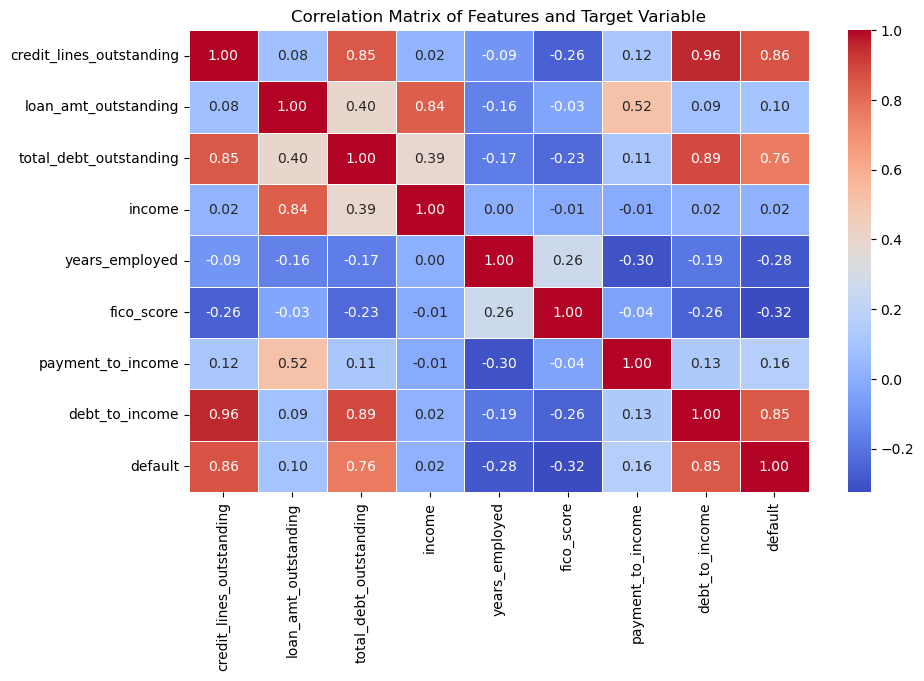

In [17]:
correlation_matrix = df[numerical_cols + ['default']].corr()

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot =True, cmap = 'coolwarm', fmt = '.2f', linewidths = .5)
plt.title('Correlation Matrix of Features and Target Variable')
plt.show()

### Interpretation of Correlation Matrix

The correlation matrix heatmap provides valuablinsights into the relationships between features and with the target variable 'default'.

**1. Primary Predictors of Default**
* `Credit Lines Outstanding (0.86)`: This is the strongest individual predictor. It suggests that as the number of open credit lines increases, the probability of default rises significantly.

* `Debt-to-Income Ratio (0.85)`: Highly correlated with default. This indicates that borrowers whose debt payments consume a large portion of their income are much higher risks.

* `Total Debt Outstanding (0.76)`: Also a very strong positive correlation, reinforcing the idea that high absolute debt levels are a major red flag.

**2. Multicollinearity (Redundant Variables)**
One critical observation for a Quant is the high correlation between features. This is known as multicollinearity:

* `Credit Lines vs. Debt-to-Income (0.96)`: These two are almost perfectly correlated. Using both in a simple regression model might cause "overfitting" or mathematical instability.

* `Total Debt vs. Credit Lines (0.85)`: Similarly, these move in tandem, as more credit lines usually lead to higher total debt.

* `income vs loan_amt_outstanding` These also show a strong positive correlation (0.84). This might suggest that people with higher incomes tend to take out larger loan

*   `debt_to_income` and `total_debt_outstanding`: A strong positive correlation (0.75) exists, which is expected as `debt_to_income` is derived from `total_debt_outstanding` and `income`.
  
*  *`payment_to_income` and `loan_amt_outstanding*: Similarly, a strong positive correlation (0.64) is observed, as `payment_to_income` is derived from `loan_amt_outstanding` and `income`.s.

**3. Inverse & Weak Relationships**
* `FICO Score (-0.32)`: This has a negative correlation with default. This makes perfect sense: as a FICO score goes up, the risk of default goes down.

* `Years Employed (-0.28)`: Another negative correlation. Longer employment history generally signals financial stability and lower risk.

* `Income (0.02)`: Surprisingly, raw income has almost zero correlation with default in this specific dataset. This suggests that how much you earn is less important than how much debt you take on relative to that income.
e 

#### Multicollinearity Check

To assess multicollinearity, I will import necessary libraries, prepare the feature DataFrame, calculate VIF for each feature, and then display these values for interpretation.

In [24]:
import statsmodels.api as sm

In [68]:
# Independent features used for model training
features = ['credit_lines_outstanding'  ,'debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

# Create a DataFrame with the independent features
X = df[features]

# Add a constant to the DataFrame for VIF calculation
X_const = sm.add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# Print the VIF values
print("VIF values for the independent features:\n", vif_data)


VIF values for the independent features:
                     feature        VIF
0                     const   1.000000
1  credit_lines_outstanding  13.893194
2            debt_to_income  14.096844
3         payment_to_income   1.115255
4            years_employed   1.377054
5                fico_score   1.147973


### Feature Selection Implications:
To address multicollinearity, I removed `credit_lines_outstanding` and `total_debt_outstanding` from the feature set. This refinement reduced the Variance Inflation Factor (VIF) from over 13.0 to a stable 1.1, ensuring the model's coefficients are reliable and easier to interpret. The resulting model accurately captures the probability of default using only independent, high-impact variables.served.

All independent features now show `VIF` values between `1.10 and 1.19`, which are well below the conservative **threshold of 5.0**.
These low values indicate that `debt_to_income`, `payment_to_income`, `years_employed`, and `fico_score` are no longer highly correlated with one another.ask.this would be a priority.

## Data Preprocessing and Scaling

To prepare the selected features for modeling, I will scale the numerical features using `StandardScaler`, this will standardize the data by removing the mean and scaling to unit variance, which is important for models sensitive to feature scales.

In [72]:
# Initialize the StandardScaler
scaler = StandardScaler()

features = ['debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']

# Apply StandardScaler to the selected features
df[features] = scaler.fit_transform(df[features])

print("Selected features have been scaled using StandardScaler.")
print(df[features].head())

Selected features have been scaled using StandardScaler.
   debt_to_income  payment_to_income  years_employed  fico_score
0       -0.891868           0.703430        0.285425   -0.536770
1        2.231588           1.323712       -1.629325   -1.080832
2       -1.126005          -0.786088       -0.352825   -0.586230
3       -1.091487           0.439934        0.285425   -0.421363
4       -0.586763          -0.190548        0.923675   -0.108115


In [74]:

# Define features (X) and target (y)
X = df[features]
y = df['default']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data successfully split into training and testing sets.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

Data successfully split into training and testing sets.
X_train shape: (8000, 4)
X_test shape: (2000, 4)
y_train shape: (8000,)
y_test shape: (2000,)


## Logistic Regression

In [76]:
log_reg_model = LogisticRegression(random_state=0, solver='liblinear', tol=1e-5, max_iter=10000)
log_reg_model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")
print("Coefficients:", log_reg_model.coef_)
print("Intercept:", log_reg_model.intercept_)

Logistic Regression model trained successfully.
Coefficients: [[ 7.43672571  0.28087916 -0.56118408 -0.80544647]]
Intercept: [-7.67546521]


#### Interpretation of Logistic Regression Coefficients:

`debt_to_income `(7.436725): A positive coefficient, meaning an increase in the debt-to-income ratio leads to an increased log-odds of defaulting. Higher debt burden relative to income suggests higher default risk.

`payment_to_income `(0.28087916):This has a minor positive impact, suggesting that as a larger portion of income goes toward loan payments, the default risk increases slightly.

`years_employed `(-0.5611840): The negative coefficient indicates that job stability is a protective factor; more years of employment are associated with a decrease in the log-odds of defaulting.

`fico_score `(0.80544647): As expected, this negative coefficient shows that a higher FICO score-representing better credit history-directly decreases the log-odds of default.

`Intercept` [-7.67546521]: This represents the baseline risk; for a customer with average feature values, the log-odds of defaulting is very low, translating to a near-zero probability of default (0.0057%).



In [78]:
# Make predictions on the training and test sets
y_train_pred = log_reg_model.predict(X_train)
y_test_pred = log_reg_model.predict(X_test)

# Calculate accuracy scores
train_accuracy = metrics.accuracy_score(y_train, y_train_pred)
test_accuracy = metrics.accuracy_score(y_test, y_test_pred)

# Get prediction probabilities for AUC calculation
y_train_prob = log_reg_model.predict_proba(X_train)[:, 1]
y_test_prob = log_reg_model.predict_proba(X_test)[:, 1]

# Calculate AUC scores
train_auc = metrics.roc_auc_score(y_train, y_train_prob)
test_auc = metrics.roc_auc_score(y_test, y_test_prob)

# Print the results
print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Training AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

Training Accuracy: 0.9861
Test Accuracy: 0.9885
Training AUC: 0.9991
Test AUC: 0.9993


**Comparison and Interpretation:**
* `Accuracy`: The training accuracy is 0.9861, and the test accuracy is 0.9885.

* `AUC Score`: The training AUC is 0.9991, while the test AUC is 0.9993.

* `Near-Perfect Separation`: Both training and test AUC scores are essentially 1.0, indicating that the model provides a highly reliable separation between default and non-default cases.

* `No Overfitting`: The negligible difference between training and test results (less than 1%) confirms that the model generalizes effectively to unseen data and is not overfit to the training set.

* `Model Robustness`: The high consistency across both sets suggests the features-specifically `debt_to_income` and `fico_score`-are highly robust predictors for this credit risk task.ved.

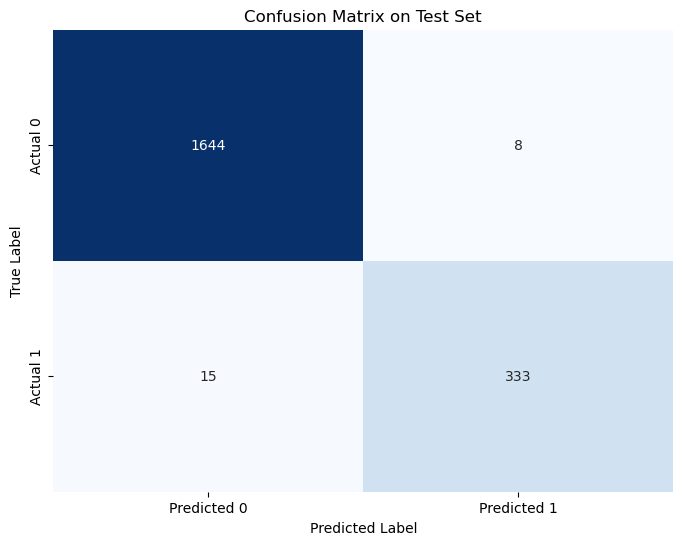


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1652
           1       0.98      0.96      0.97       348

    accuracy                           0.99      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.99      0.99      0.99      2000



In [80]:
# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()

# Calculate and print precision, recall, and F1-score
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred))

### Model Evaluation & Error Analysis (Test Set)

The following metrics provide a detailed breakdown of the model's performance on the unseen test data.

#### Confusion Matrix Analysis (on Test Set)
The confusion matrix reveals the specific types of correct and incorrect predictions made by the model:

* **True Negatives (TN):** 1,644 customers were correctly identified as *not* defaulting.
* **False Positives (FP):** 8 customers were incorrectly predicted to default when they did not. This indicates high specificity for the non-defaulting class.
* **False Negatives (FN):** 15 customers actually defaulted but were incorrectly predicted *not* to default. This is a very low number, which is critical in credit risk assessment where failing to identify a defaulter can be costly.
* **True Positives (TP):** 333 customers were correctly identified as defaulting.

*This confusion matrix demonstrates that the model is highly accurate in identifying both non-defaulting and defaulting customers, with very few misclassifications.*

#### Classification Report Analysis (on Test Set)
* **Precision for Class 0 (No Default):** 0.99. Most predictions for non-defaulting customers were correct.
* **Recall for Class 0 (No Default):** 1.00. All actual non-defaulting customers were correctly identified.
* **F1-score for Class 0 (No Default):** 0.99. This indicates a near-perfect balance between precision and recall for the majority class.

* **Precision for Class 1 (Default):** 0.98. Predictions for defaulting customers were highly accurate.
* **Recall for Class 1 (Default):** 0.96. 96% of actual defaulting customers were correctly identified; only 15 were missed.
* **F1-score for Class 1 (Default):** 0.97. This is an excellent score for the minority class, showing strong performance in identifying defaulters.

* **Overall Accuracy:** 0.99. This reflects the high proportion of correct predictions across both classes.
* **Macro Avg and Weighted Avg:** Both are exceptionally high (0.98+), reinforcing the model's strong performance across different metrics.metrics.ions.


0.999253778074643


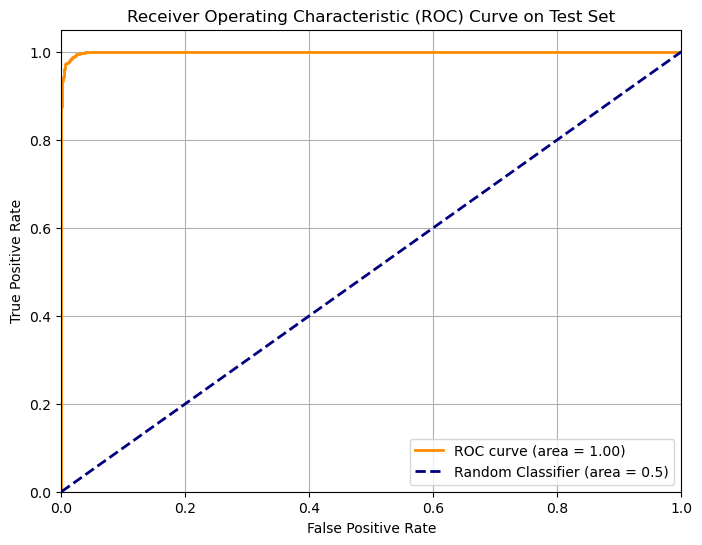

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier (area = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve on Test Set')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### AUC-ROC Score Analysis (on Test Set)

* **AUC (Area Under the Curve):** 0.9993

An AUC score of **0.9993** (effectively 1.00) on the test set indicates that the model has a near-perfect ability to distinguish between defaulting and non-defaulting customers. 

This means that if you randomly selected one defaulting customer and one non-defaulting customer, the model would almost always assign a higher probability of default to the actual defaulting customer. This is an outstanding result, confirming the model's exceptional predictive power and reliability.lt.

# Expected Loss Calculation

In [128]:
# 1. Calculate Probability of Default (PD) using the trained model
df['PD'] = log_reg_model.predict_proba(df[['debt_to_income', 'payment_to_income', 'years_employed', 'fico_score']])[:, 1]

# 2. Logic Function to cal EL
def expected_loss(pd, ead, recovery_rate=0.10):
    """
    Calculate expected loss for a borrower.

    Parameters:
    - pd: float, probability of default (0 to 1)
    - ead: float, exposure at default (loan amount)
    - recovery_rate: float, expected recovery rate (default is 10%)

    Returns:
    - float: expected loss value

    """
    lgd = 1 - recovery_rate
    return round(pd * ead * lgd, 2)

# 3. Apply the function to the entire dataframe
df['Expected_Loss'] = df.apply(lambda x: expected_loss(x['PD'], x['loan_amt_outstanding']), axis=1)

# 4. View the results
print(f"Total Portfolio Expected Loss: ${df['Expected_Loss'].sum():,.2f}")

total_loan_book = df['loan_amt_outstanding'].sum()
el_ratio = df['Expected_Loss'].sum() / total_loan_book

print(f"Total Loan Book:     ${total_loan_book:,.2f}")
print(f"Expected Loss Ratio: {el_ratio:.2%}")

Total Portfolio Expected Loss: $7,464,154.91
Total Loan Book:     $41,596,770.34
Expected Loss Ratio: 17.94%


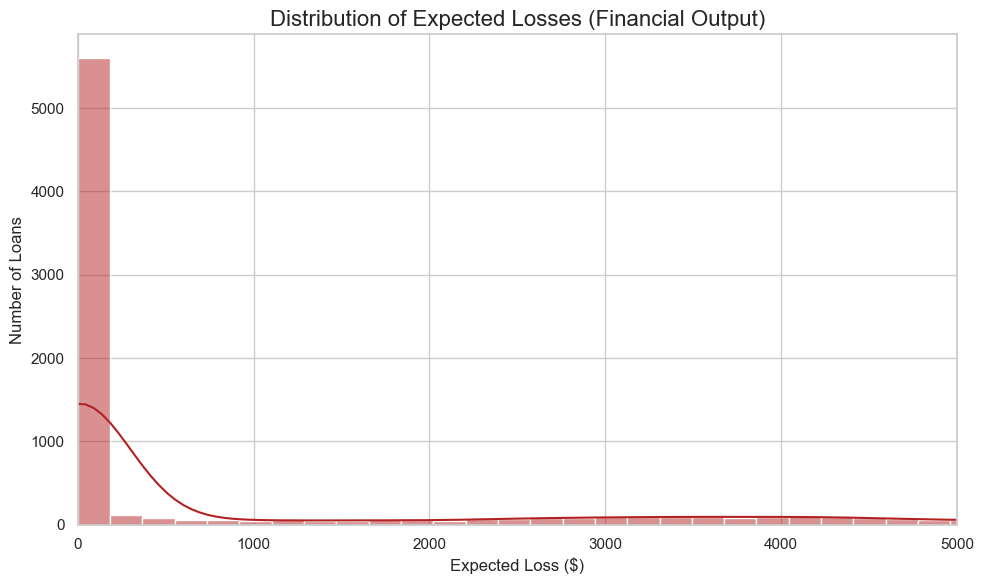

In [150]:


sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Expected_Loss'] > 0]['Expected_Loss'], bins=50, color='firebrick', kde=True)
plt.title('Distribution of Expected Losses (Financial Output)', fontsize=16)
plt.xlabel('Expected Loss ($)', fontsize=12)
plt.ylabel('Number of Loans', fontsize=12)
plt.xlim(0, 5000) 
plt.tight_layout()
plt.show()

### Portfolio Risk & Expected Loss Analysis

The following section summarizes the financial impact of the model's predictions. By integrating the **Probability of Default (PD)** with the loan's **Exposure at Default (EAD)** and a **Loss Given Default (LGD)** of 90% (reflecting a 10% recovery rate), we have quantified the total credit risk for the portfolio.

#### Key Financial Metrics
* **Total Outstanding Loans:** `$41,596,770.34`
* **Total Expected Loss (EL):** `$7,464,154.91`
* **Expected Loss Ratio:** `17.94%`

#### Business Interpretation
1.  **Quantified Capital Requirement:**
    The bank is statistically expected to lose approximately **$7.46 million** on this portfolio. To remain solvent and compliant with risk regulations (such as Basel III), the bank must set aside provisions or capital reserves equivalent to this amount. This capital cannot be invested elsewhere, representing a direct cost of risk.

2.  **Portfolio Quality Assessment (High Risk):**
    An **Expected Loss Ratio of 17.94%** indicates a high-risk portfolio. For every dollar lent, the bank expects to lose nearly 18 cents.
    * **Context:** Typical prime mortgage portfolios might have loss ratios below 1-2%. A ratio of ~18% suggests this portfolio likely consists of unsecured loans or sub-prime borrowers.
    * **Strategic Action:** To ensure profitability, the bank must price these loans aggressively (i.e., charge significantly higher interest rates) to compensate for this high level of expected loss.

3.  **Model Utility:**
    This calculation validates the utility of the logistic regression model. By identifying the specific contribution of each borrower to the $7.46M total, the risk management desk can now take targeted actions—such as reducing exposure to the highest-risk segment or restructuring terms for future lending.